In [81]:
# 參考資源：http://pbpython.com/effective-matplotlib.html,  http://pbpython.com/bullet-graph.html

In [16]:
# Figure is the final image that may contain 1 or more axes. The Axes represent an individual plot. 

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter

import pandas as pd 
import numpy as np 
import seaborn as sns

In [18]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [21]:
top_10 = df.groupby("name")["ext price","quantity"].agg({"ext price":"sum","quantity":"count"}).sort_values("ext price",ascending=False)[:10].reset_index()

In [23]:
top_10.columns = [["Name","Sales","Purchases"]]

In [24]:
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


In [26]:
plt.style.available  # see the styles avialabel

['seaborn-whitegrid',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'bmh',
 'ggplot',
 'seaborn-talk',
 'seaborn-dark',
 'seaborn-deep',
 'seaborn-darkgrid',
 'seaborn-pastel',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-poster',
 'seaborn-bright',
 'seaborn-paper',
 'classic',
 'seaborn-dark-palette',
 'grayscale',
 'fivethirtyeight',
 'seaborn-notebook']

In [27]:
plt.style.use("ggplot")

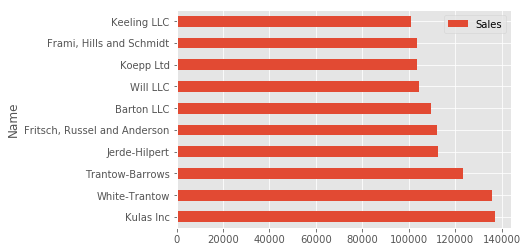

In [33]:
top_10.plot(kind = "barh",y="Sales",x="Name")   # pandas built-in visualization..very quick

## Key point

In [77]:
# use the object-oriented way to make plots 
# Any future customization will be done via the ax or fig objects.

#### E.g.1

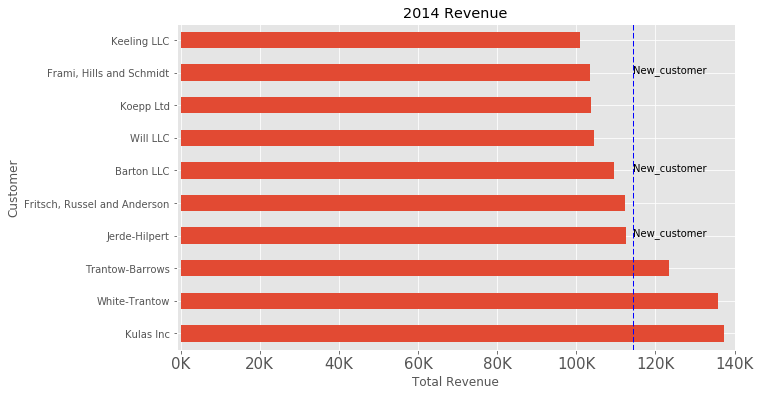

In [83]:
fig,ax = plt.subplots(figsize=(10,6))


top_10.plot(kind = "barh",y="Sales",x="Name", ax=ax)   # parameter_ax, magic !
ax.set_xlim([-1000,140000])
ax.set_xlabel("Total Revenue")
ax.set_ylabel("Customer")
ax.set(title="2014 Revenue")


def currency(x,pos):
    if x>= 1000000:
        return "${:1.1f}M".format(x*1e-6)        # f 應該是 float的意思
    else:
        return "{:1.0f}K".format(x*1e-3) 
formatter = FuncFormatter(currency)      # set the formatter 
ax.xaxis.set_major_formatter(formatter)

plt.xticks(fontsize=15)




# Add a line for the average
ax.axvline(x=top_10["Sales"].mean(), color='b', label='Average', linestyle='--', linewidth=1)
# Add text
for cust in [3,5,8]:
    ax.text(top_10["Sales"].mean(), cust, "New_customer")


ax.legend().set_visible(False)

#### E.g.2

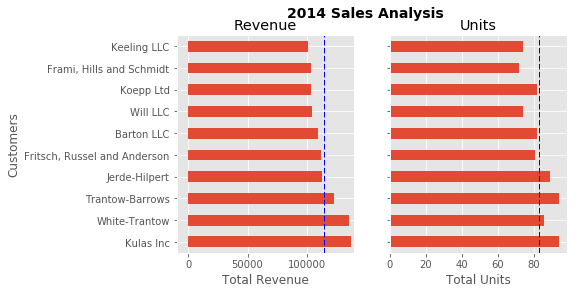

In [78]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold');

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

#### save figures

In [79]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [80]:
# fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

## play ground 

#### bullet graph

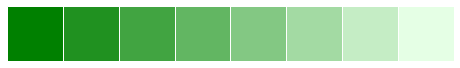

In [86]:
sns.palplot(sns.light_palette("green",8, reverse=True))

In [88]:
limits = [80,100,150]
data_to_plot = ["Example 1", 105, 120 ]

In [89]:
palette = sns.color_palette("Blues_r", len(limits))

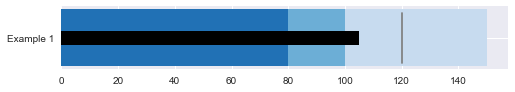

In [142]:
fig, ax = plt.subplots()
ax.set_aspect('equal')   # equal means that the x and y dimensions are the same length in data coordinates.
ax.set_yticks([1])   # 數字代表的是yticks的位置
ax.set_yticklabels([data_to_plot[0]])   # yticks要顯示的東西, 不要跟ylabel搞混了

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=20, color=palette[idx])
    prev_limit = lim
    
# Add smaller bar chart 
ax.barh([1], data_to_plot[1], color = "black", height = 5)

# Add target line
ax.axvline(data_to_plot[2], color = "gray", ymin=0.1, ymax=0.9)